<a href="https://colab.research.google.com/github/darshan-jain/19CSE305-ML/blob/main/CB_EN_U4CSE19126_MEVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import plotly as py 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [113]:

mssing_values=['\t43' , '\t?' , '\tno' , '\tyes' , ' yes', np.nan , 'NaN', 'ckd\t']
# data

data = pd.read_csv("https://raw.githubusercontent.com/darshan-jain/19CSE305-ML/main/Chronic_Kidney_Disease.csv",na_values=mssing_values)

In [114]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [115]:
data.shape

(400, 26)

In [116]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              399 non-null    float64
 1   age             385 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             314 non-null    float64
 17  wc              294 non-null    flo

In [118]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,399.000000,385.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,314.000000,294.000000,269.000000
mean,199.892231,51.615584,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.687898,8406.122449,4.707435
std,115.492678,17.270301,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.156679,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,100.500000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,200.000000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.500000,65.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,46.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [119]:
data.isnull().sum()

id                  1
age                15
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                86
wc                106
rc                131
htn                 2
dm                  8
cad                 4
appet               1
pe                  1
ane                 1
classification      2
dtype: int64

In [120]:
categorial_cols = [col for col in data.columns if data[col].dtype=="object"]
categorial_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [121]:
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    data[i].fillna(data[i].mean(),inplace=True)

In [122]:
rbc = pd.get_dummies(data[["rbc"]],drop_first=True)
rbc.head()


,rbc_normal
0,0
1,0
2,1
3,1
4,1


In [123]:
pc = pd.get_dummies(data[["pc"]],drop_first=True)
pc.head()

,pc_normal
0,1
1,1
2,1
3,0
4,1


In [124]:
pcc = pd.get_dummies(data[["pcc"]],drop_first=True)
pcc.head()

,pcc_present
0,0
1,0
2,0
3,1
4,0


In [125]:
ba = pd.get_dummies(data[["ba"]],drop_first=True)
ba.head()

,ba_present
0,0
1,0
2,0
3,0
4,0


In [127]:
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [48]:
data = pd.concat([data,rbc,pc,pcc,ba],axis=1)

In [130]:
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,rbc_normal,pc_normal,pcc_present,ba_present
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd,0,1,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd,0,1,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd,1,1,0,0
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd,1,0,1,0
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd,1,1,0,0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              399 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  wc              400 non-null    float64
 14  rc              400 non-null    float64
 15  htn             398 non-null    object 
 16  dm              392 non-null    object 
 17  cad             396 non-null    obj

In [132]:
k=data["age"].apply(lambda x : int(x)//10).to_list()

In [133]:
a=[0]*10
for i in range(len(k)):
    a[k[i]]+=1
a

[10, 11, 23, 43, 65, 97, 96, 47, 7, 1]

In [134]:
data["classification"].value_counts()

ckd       248
notckd    150
Name: classification, dtype: int64

In [135]:
data.replace({"notckd":0,"ckd":1,"ckd\t":1},inplace=True)

In [136]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present'],
      dtype='object')

In [150]:
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification,rbc_normal,pc_normal,pcc_present,ba_present
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1,0,0
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,1,0
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0,0


In [149]:
x = data.loc[:,['age', 'bp', 'rc','wc','appet','pc_normal','htn','hemo','bgr','dm','ane']]
y = data["classification"]

In [151]:
score=[] #these variables will be used to show the algorithm name and its successes.
algorithms=[] 

In [152]:

#Preparing the test and training set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
X_train.head()

,age,bp,rc,wc,appet,pc_normal,htn,hemo,bgr,dm,ane
336,25.0,60.0,5.200000,9200.000000,1,1,0,15.2,119.000000,0,0
64,55.0,80.0,4.707435,8406.122449,1,1,0,9.8,146.000000,0,0
55,35.0,80.0,4.707435,8406.122449,1,1,0,9.5,148.036517,0,0
106,50.0,90.0,4.707435,6500.000000,1,0,1,6.0,89.000000,1,1
300,45.0,60.0,5.800000,9200.000000,1,1,0,15.0,114.000000,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


test accuracy 0.9083333333333333


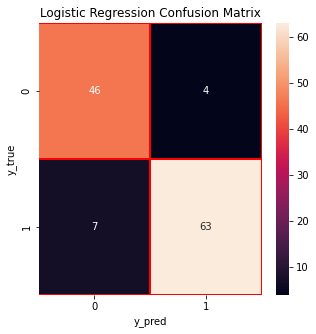

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Logistic Regression")
print("test accuracy {}".format(lr.score(x_test,y_test)))
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Decision Tree accuracy: 90.83333333333333


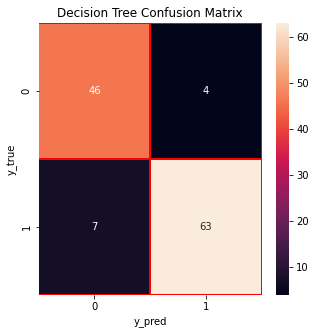

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree accuracy:",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)
algorithms.append("Decision Tree")

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Random Forest accuracy = 0.9625


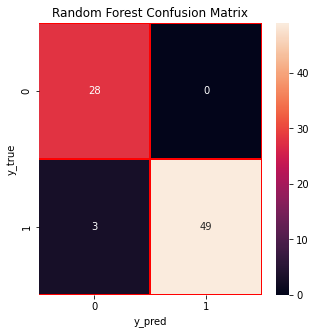

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
score.append(rf.score(X_test,y_test)*100)
algorithms.append("Random Forest")
print("Random Forest accuracy =",rf.score(X_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

KNN accuracy = 76.66666666666667


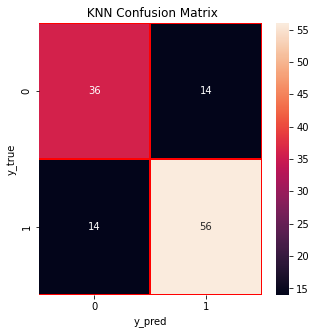

In [84]:
#
x = data.loc[:,['age', 'bp', 'rc','wc','appet','pc_normal','htn','hemo','bgr','dm','ane']]
y = data["classification"]
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()


In [103]:
final = pd.DataFrame(list(zip(algorithms, score)))
final

,0,1
0,Random Forest,96.250000
1,KNN,76.666667
2,Decision Tree,90.833333
3,Logistic Regression,90.833333
4,Logistic Regression,90.833333


Observation:

We find that Random Forest has the best accuracy score. 

We also find that KNN has the worst accuracy score.

Logistic Regression and Decision Tree have a similar accuracy score.


